# Qiskit & IBM Quantum Workshop

# How to Use this Notebook in your IBM Quantum Lab Account

1. go to https://ibm.biz/qiskit-tokyo
2. click 'raw' button in GitHub, this will open the notebook file in a new tab
![](raw_button.png)

3. Right click on the raw file and save the file in jupyter notebook format (`.ipynb`)
![](save.png)

4. In IBM Quantum Lab, select upload button on in top left and upload the notebook file
![](upload_button.png)

5. If you didn't save it in `.ipynb` format you can rename the file in the jupyter lab
![](rename_button.png)

6. Now you can open the notebook in your IBM Quantum Lab environment! (note: if you want the images to display in your lab version you will need to download them from the github folder where the notebook is and upload it into your lab folder as well)

![](open_notebook.png)

### Goal: Show you the toolbox! Breadth not depth, questions at the end

### Contents:

- Welcome & About Me!


- Let's Explore IBM Quantum Labs, composer, services etc.


- What is Qiskit & the Qiskit Ecosystem


- Representing Quantum States (Qiskit):
  - [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) (qiskit.circuit)
  - [Quantum Information](https://qiskit.org/documentation/apidoc/quantum_info.html) (qiskit.quantum_info)


- Running on devices and getting results (Qiskit Ecosystem):
  - [Qiskit Aer (Simulator)](https://qiskit.org/documentation/aer/)
  - IBM Quantum Devices
  - Other providers


- Visualising Results (Qiskit)
  - [Visualization](https://qiskit.org/documentation/apidoc/visualization.html) (qiskit.visualization)


- NEW(ish)! Runtime Primitives (Qiskit & Qiskit Ecosystem)
  - [Qiskit Primitives](https://qiskit.org/documentation/apidoc/primitives.html) (qiskit.primitives)
  - [IBM Qiskit Runtime](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/)


- Applications based Ecosystem Packages
   - High Level Applications - [Qiskit Nature](https://qiskit.org/documentation/nature/), [Qiskit Machine Learning](https://qiskit.org/documentation/machine-learning/)
   - Low Level Applications - [Qiskit Experiments](https://qiskit.org/documentation/experiments/), [Qiskit Dynamics](https://qiskit.org/documentation/dynamics/)


- What Next?


## About Me

Abby Mitchell - Quantum Developer Advocate, IBM

**Personal website:** https://abbymitchell.dev

**GitHub:** https://github.com/javabster

**Linkedin:** https://www.linkedin.com/in/abby-mitchell/

**Twitter:** https://twitter.com/javabster

## Let's Explore! 

https://quantum-computing.ibm.com/

- All IBM Quantum Hardware Systems: https://quantum-computing.ibm.com/services/resources?tab=systems
  - up tp 7Q on open systems
- IBM Quantum Composer (good for beginners!): https://quantum-computing.ibm.com/composer
- IBM Quantum Lab: https://lab.quantum-computing.ibm.com/

# Qiskit Main Packages

![](qiskit_overview.png)





### Including the Ecosystem:
![](ecosystem.png)

https://qiskit.org/ecosystem

3 Tiers:
- Main
- Extensions
- Community

--> You can submit your open-source project to the Ecosystem!

What we'll focus on: mostly Qiskit (Terra)  
If we have time: other packages

# Time for some code! (finally!)

In [6]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

/var/folders/lm/2xnym92d5ml9lhysdxtjv66h0000gn/T/ipykernel_53112/3219495531.py:10: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


## Qiskit submodules we'll be using

- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) (`qiskit.circuit`)
- [Quantum Information](https://qiskit.org/documentation/apidoc/quantum_info.html) (`qiskit.quantum_info`)
- [Qiskit Aer (Simulator)](https://qiskit.org/documentation/aer/)
- [Visualization](https://qiskit.org/documentation/apidoc/visualization.html) (`qiskit.visualization`)
- [Primitives](https://qiskit.org/documentation/apidoc/primitives.html) (`qiskit.primitives`)


Other modules: https://qiskit.org/documentation/apidoc/terra.html

## Quantum Circuit

Gates are matrices, applying gates is matrix multiplaction

Simplest example - the Bell State

In [2]:
from qiskit import QuantumCircuit

# Initialize quantum circuit
bell = QuantumCircuit(2)

# Apply gates
bell.h(0)
bell.cx(0,1)

# Measure qubits
bell.measure_all()

# Visualise circuit
print(bell)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [3]:
# custom rotations

circuit = QuantumCircuit(1)
circuit.u(np.pi/2,np.pi/2,np.pi/2,0)

print(circuit)

   ┌────────────────┐
q: ┤ U(π/2,π/2,π/2) ├
   └────────────────┘


In [4]:
# matrix -> unitary gate

matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
          
circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])

print(circuit)

     ┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘


In [5]:
print(circuit.decompose())

global phase: 0.84108
     ┌─────────────────────┐     ┌────────────────────┐
q_0: ┤ U3(π/2,-0.055683,0) ├──■──┤ U3(π/2,-π,-3.0859) ├
     └┬────────────────────┤┌─┴─┐├────────────────────┤
q_1: ─┤ U3(π/2,0,-0.84108) ├┤ X ├┤ U3(π/2,-0.84108,0) ├
      └────────────────────┘└───┘└────────────────────┘


In [6]:
qc = QuantumCircuit(2)

# State Preparation
# qc2.prepare_state('01')
# qc2.prepare_state([0,1, 0, 0])
qc.prepare_state(2)

print(qc)

     ┌───────────────────────┐
q_0: ┤0                      ├
     │  State Preparation(2) │
q_1: ┤1                      ├
     └───────────────────────┘


In [7]:
print(qc.decompose())

          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘


**Parametric Circuits** - Great for Variational Algorithms

In [8]:
from qiskit.circuit import Parameter

# Define a variable theta to be a parameter with name 'theta'
theta = Parameter('theta')

# Initialize a quantum circuit with one qubit
quantum_circuit = QuantumCircuit(1)

# Add a parametrized RX rotation on the qubit
quantum_circuit.rx(theta, 0)

print(quantum_circuit)

   ┌───────────┐
q: ┤ Rx(theta) ├
   └───────────┘


In [9]:
# Set the value of the parameter
theta_value = np.pi

# Bind the value to the parametrized circuit
qc = quantum_circuit.bind_parameters({theta: theta_value})

print(quantum_circuit)

   ┌───────────┐
q: ┤ Rx(theta) ├
   └───────────┘


**Control Flow Operations - new syntax for Qiskit Terra 0.23!**

In [10]:
# old way

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.x(0).c_if(0, False)
qc.draw()

┌───┐┌─┐   ┌───┐   
  q: ┤ H ├┤M├───┤ X ├───
     └───┘└╥┘   └─╥─┘   
           ║ ┌────╨────┐
c: 1/══════╩═╡ c_0=0x0 ╞
           0 └─────────┘

In [11]:
qc = QuantumCircuit(1, 2)
qc.h(0)  # This is just a stand-in for more complex real-world setup.
qc.measure(0, 0)

# Unlike c_if, we can have more than one instruction in the block, and it only
# requires a single evaluation of the condition.  That's especially important if
# the bit is written to part way through the block.
with qc.if_test((0, True)): # if q0 == 1, reset and flip it
    qc.reset(0)
    qc.x(0)
qc.measure(0, 1)

qc.draw()
# backend.run(qc).result().get_counts()  # {'00': 0.5, '11': 0.5}

┌───┐┌─┐┌──────────┐┌─┐
  q: ┤ H ├┤M├┤0         ├┤M├
     └───┘└╥┘│  If_else │└╥┘
c_0: ══════╩═╡0         ╞═╬═
             └──────────┘ ║ 
c_1: ═════════════════════╩═

In [12]:
# Repeat instructions until success with while loop
# Previously this wasn't representable in Qiskit at all, because we didn't have
# any concept of a run-time loop.

qc = QuantumCircuit(1, 2)
qc.h(0)
qc.measure(0, 0)
with qc.while_loop((0, False)): # as long as q0 == 0, reset, add h and measure again until q0 == 1
    qc.reset(0)
    qc.h(0)
    qc.measure(0, 0)
qc.measure(0, 1)

qc.draw()
# backend.run(qc).result().get_counts()  # {'11': 1}

┌───┐┌─┐┌─────────────┐┌─┐
  q: ┤ H ├┤M├┤0            ├┤M├
     └───┘└╥┘│  While_loop │└╥┘
c_0: ══════╩═╡0            ╞═╬═
             └─────────────┘ ║ 
c_1: ════════════════════════╩═

## Quantum Info

In [13]:
from qiskit.quantum_info.operators import Operator, Pauli

In [14]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Other Qiskit classes can be converted to `Operator`s

- `Pauli` objects (also from quantum info module)

- `Gate` and `Instruction` objects

- `QuantumCircuit` objects

In [15]:
# Create an Operator from a Pauli object

pauliXX = Pauli('XX')
Operator(pauliXX)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [16]:
from qiskit.extensions import CXGate

# Create an Operator for a Gate object
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [17]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

In [18]:
# Create operators
X = Operator(Pauli('X'))
Y = Operator(Pauli('Y'))

# X.tensor(Y) # X tensor Y
# X.compose(Y) # YX

In [19]:
# Create an operator
XX = Operator(Pauli('XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
print(circ)

     ┌──────────┐┌─┐   
q_0: ┤0         ├┤M├───
     │  Unitary │└╥┘┌─┐
q_1: ┤1         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  0  1 


In [20]:
# Add to Pauli operator to circuit
circ2 = QuantumCircuit(2, 2)
circ2.append(Pauli('XX'), [0, 1])
circ2.measure([0,1], [0,1])
print(circ2)

     ┌────────────┐┌─┐   
q_0: ┤0           ├┤M├───
     │  Pauli(XX) │└╥┘┌─┐
q_1: ┤1           ├─╫─┤M├
     └────────────┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1 


## Now we've created our circuits, let's get some results!

## Simulator - Qiskit Aer 

In [2]:
from qiskit import Aer

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Let's simulate some results from our bell state

In [22]:
print(bell)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [23]:
from qiskit import transpile

# choose simulator backend
simulator = Aer.get_backend('aer_simulator')

# Transpile for simulator
bell_circ = transpile(bell, simulator)

# Run and get counts
result = simulator.run(bell_circ).result()
counts = result.get_counts(bell_circ)
print(counts)

{'00': 500, '11': 524}


In [24]:
# get results for each shot

result = simulator.run(bell_circ, shots=10, memory=True).result()
memory = result.get_memory(bell_circ)
print(memory)

['11', '11', '11', '11', '00', '11', '00', '11', '11', '00']


Simulate with Noise

In [25]:
from qiskit.providers.fake_provider import FakeBelem
from qiskit.providers.aer import AerSimulator

# initialise simulator based on fake backend
device_backend = FakeBelem()
sim_bel = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(bell, sim_bel)

# Execute noisy simulation and get counts
result_noise = sim_bel.run(tcirc).result()
counts_noise = result_noise.get_counts(0)

print(counts)
print(counts_noise)


{'00': 500, '11': 524}
{'01': 30, '00': 500, '10': 35, '11': 459}


In [26]:
# get statevector info
# (must construct quantum circuit without measure)

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)

circ.save_statevector()

# choose simulator backend
sim = Aer.get_backend('aer_simulator')

# Transpile for simulator
tr_circ = transpile(circ, sim)

# Run and get counts
sv_res = sim.run(tr_circ).result()

array_to_latex(sv_res.get_statevector())


<IPython.core.display.Latex object>

In [27]:
# get unitary matrix for circ with simulator
# (must construct quantum circuit without measure)

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)

circ.save_unitary()

# choose simulator backend
sim = Aer.get_backend('aer_simulator')

# Transpile for simulator
tr_circ = transpile(circ, sim)

# Run and get counts
u_res = sim.run(tr_circ).result()

array_to_latex(u_res.get_unitary())


<IPython.core.display.Latex object>

## Real Hardware 🎉

In [28]:
from qiskit.tools.jupyter import *
%qiskit_backend_overview

In [29]:
from qiskit.providers.ibmq import least_busy

# (provider = ibm open gruop, auto-loaded at top imports)
least_busy_device = least_busy(provider.backends(simulator=False, filters=lambda b: b.configuration().n_qubits >= 2))

least_busy_device

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# Transpile for real device
# bell_circ_real = transpile(bell, least_busy_device)

# # Run and get counts
# result = least_busy_device.run(bell_circ_real).result()
# counts_real = result.get_counts(bell_circ_real)
# print(counts_real)

(See Lab jobs tab for job progress)

In [ ]:
# your_provider = IBMQ.get_provider('your-hub-name', 'your-group-name', 'your-project-name')

# your_backend = your_provider.get_backend('ibmq_montreal')

# your_result = your_backend.run(bell_circ_real).result()

# counts_real = result.get_counts(bell_circ_real)

Qiskit is backend agnostic!

In [ ]:
# !pip install qiskit-ionq

# from qiskit_ionq import IonQProvider
# provider = IonQProvider()

# ionq_backend = provider.get_backend("ionq_qpu")
# job = ionq_backend.run(bell)

# plot_histogram(job.get_counts())

## Visualisation

In [30]:
bell.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

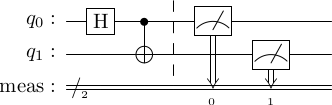

In [31]:
bell.draw(output='latex')

In [32]:
bell.draw(output='text')

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

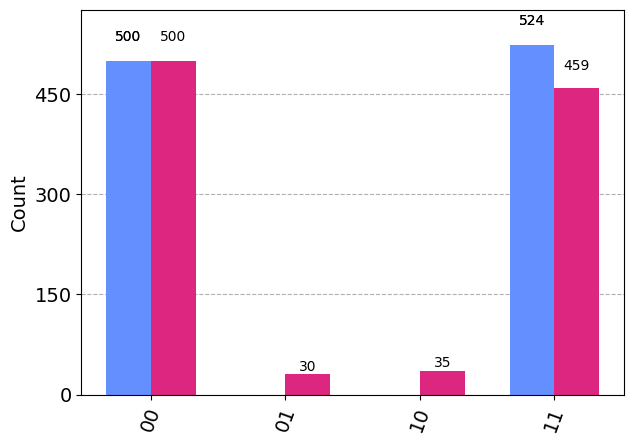

In [33]:
from qiskit.visualization import plot_histogram

data = [counts, counts_noise]

plot_histogram(data)

Many visualisation functions play well with matplotlib, so you can sued some more advanced styling features. some common arguments for all visualisation functions:
    
- `title` (str): a text string to use for the plot title.
- `legend` (list): a list of strings to use for labels of the data.
- `figsize` (tuple): figure size in inches .
- `color` (list): a list of strings for plotting.
- `ax` (`matplotlib.axes.Axes`): An optional Axes object to be used for the visualization output. If none is specified a new `matplotlib.figure.Figure` will be created and used. Additionally, if specified there will be no returned Figure since it is redundant.
- `filename` (str): file path to save image to.

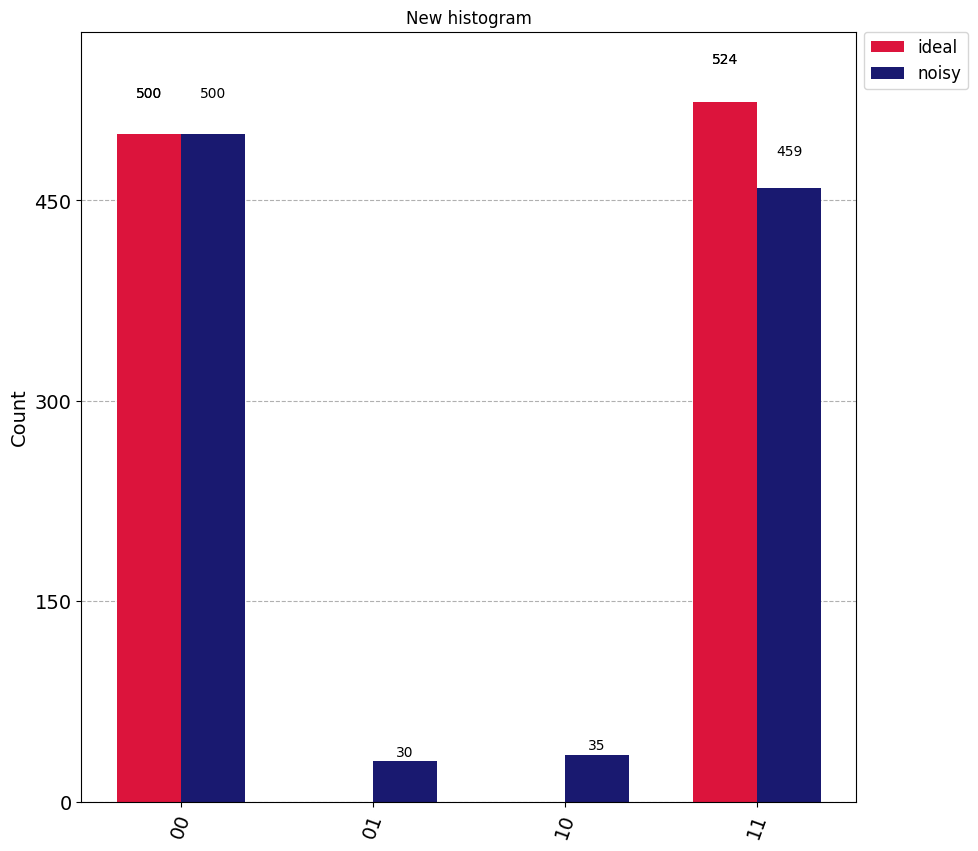

In [34]:
legend = ['ideal', 'noisy']
title = 'New histogram'
figsize = (10,10)
color=['crimson','midnightblue']
plot_histogram(data, legend=legend, title=title, figsize=figsize, color=color)

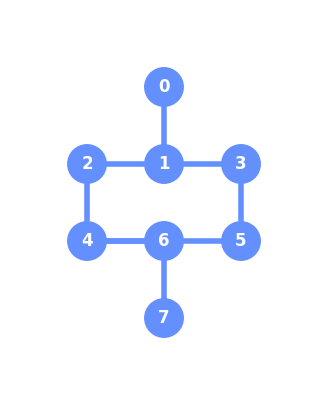

In [35]:
# visualise coupling maps (for device layouts) - small heavy hex

from qiskit.visualization import plot_coupling_map

num_qubits = 8
qubit_coordinates = [[0, 1], [1, 1], [1, 0], [1, 2], [2, 0], [2, 2], [2, 1], [3, 1]]
coupling_map = [[0, 1], [1, 2], [1, 3], [3, 5], [4, 6], [4, 5], [2, 4], [6, 7]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

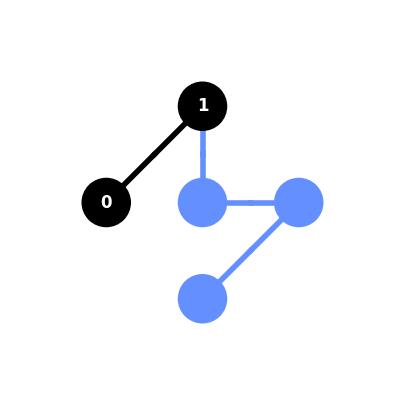

In [36]:
# visualise how your qubits will be laid out on a given device

from qiskit.visualization import plot_circuit_layout

backend = provider.get_backend('ibmq_manila')

belem_bell = transpile(bell, backend=backend)

plot_circuit_layout(belem_bell, backend)

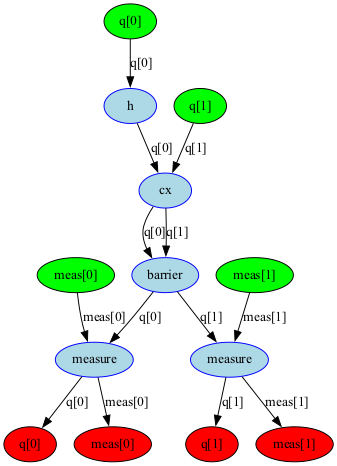

In [37]:
# DAG Drawer
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer

dag = circuit_to_dag(bell)
dag_drawer(dag)

## Primitives - New(ish) Feature 🎉

To understand Qiskit Runtime Primitives we need to take a trip down IBM Quantum memory lane...

![](circuit_flow.png)

![](runtime_prog_flow.png)

![](circ_runtime_comparison.png)

![](what_we_want.png)

![](primitives.png)

![](primitives_comparison.png)

![](sampler_estimator.png)


#### Simple Sampler Example

In [38]:
bell.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [39]:
from qiskit.primitives import Sampler

sampler = Sampler(options={"shots": 100})
job = sampler.run(bell) # uses local simulator under the hood
result = job.result()

print(result)

SamplerResult(quasi_dists=[{0: 0.52, 3: 0.48}], metadata=[{'shots': 100}])


#### Simple Estimator Example

In [7]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2

observable = SparsePauliOp(["ZZ"])
ansatz = EfficientSU2(2, reps=1).decompose()
values = np.random.random(ansatz.num_parameters)

ansatz.draw()

┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[2]) ├──■──┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├
     ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├
     └──────────┘└──────────┘└───┘└──────────┘└──────────┘

In [8]:
from qiskit.primitives import Estimator

estimator = Estimator()
job = estimator.run(3*[ansatz], 3*[observable], 3*[values]) # calls simulator under the hood
result = job.result()

print(result)

EstimatorResult(values=array([0.84399055, 0.84399055, 0.84399055]), metadata=[{}, {}, {}])


![](primitives_code.png)

#### Use Primitives with IBM Devices via Sessions - Still in development 🛠 DOUBLE CHECK THIS

If you want to get results from IBM hardware using primitives, you need to use the `qiskit_ibm_runtime` provider, which facilitates the connection to the IBM hardware via sessions.

In [47]:
# from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
# from qiskit import QuantumCircuit

# service = QiskitRuntimeService(
#     channel='ibm_quantum',
#     instance="ibm-q/open/main"
# )

# # print(service.backends())

# # Execute the Bell circuit
# with Session(service=service, backend="ibm_oslo") as session:
#     primitive = Sampler(session=session)

#     # now we can run multiple jobs but only queue once
#     job = primitive.run([bell], [[]])
#     samples = job.result().quasi_dists[0]
#     print(samples)

#     job = primitive.run([bell], [[]])
#     samples = job.result().quasi_dists[0]
#     print(samples)

KeyboardInterrupt: 

Why use runtime primitives?

TL;DR - it's a lot faster

# Low Level Applications - Qiskit Experiments (previously qiskit ignis)

Qiskit Experiments provides both a library of standard quantum characterization, calibration, and verification experiments, and a general framework for implementing custom experiments which can be run on quantum devices through Qiskit. Most useful part -> Experiment Library

**E.g. Randomised Benchmarking**  
A randomized benchmarking (RB) experiment consists of the generation of random Clifford circuits on the given qubits such that the unitary computed by the circuits is the identity. After running the circuits, the number of shots resulting in an error (i.e. an output different than the ground state) are counted, and from this data one can infer error estimates for the quantum device, by calculating the Error Per Clifford. See Qiskit Textbook for an explanation on the RB method

In [9]:
!pip install qiskit-experiments

  Using cached qiskit_experiments-0.4.0-py3-none-any.whl (399 kB)
  Using cached uncertainties-3.1.7-py2.py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 1.4 MB/s eta 0:00:00
  Using cached pandas-1.5.3-cp39-cp39-macosx_10_9_x86_64.whl (12.0 MB)
  Using cached future-0.18.3.tar.gz (840 kB)
  Preparing metadata (setup.py) ... done
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)


  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=660665e486d2c720a033b0451652690fded4938125560b05a0e6e84bffe31e75
  Stored in directory: /Users/abbymitchell/Library/Caches/pip/wheels/bf/5d/6a/2e53874f7ec4e2bede522385439531fafec8fafe005b5c3d1b
Successfully built future


Adding a job from a backend (aer_simulator) that is different than the current backend (fake_belem). The new backend will be used, but service is not changed if one already exists.


Gate error ratio: {'rz': 0.0, 'sx': 1.0, 'x': 1.0}


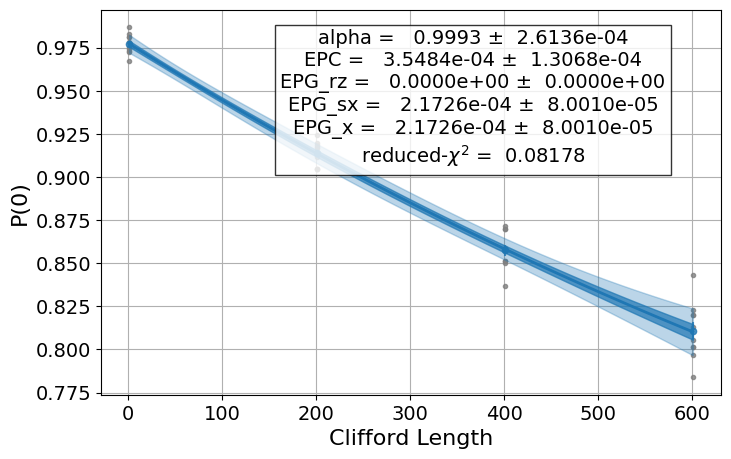

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 7
 - degree of freedom: 1
 - chi-square: 0.08177624227139339
 - reduced chi-square: 0.08177624227139339
 - Akaike info crit.: -9.560251501833152
 - Bayesian info crit.: -11.401368418473481
 - init params:
  * a = 0.4775117367267202
  * alpha = 0.9992858709154655
  * b = 0.5
 - fit params:
  * a = 0.4818626941666234 ± 0.15054771158704747
  * alpha = 0.9992903148243057 ± 0.00026135918679156216
  * b = 0.49570715233893603 ± 0.15110653667789226
 - correlations:
  * (a, b) = -0.9999392719437707
  * (alpha, b) = -0.9977186302024177
  * (a, alpha) = 0.9972112828759674
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: alpha
- value: 0.99929+/-0.00026
- χ²: 0.08177624227139339
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisRe

In [10]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits
from qiskit.providers.fake_provider import FakeBelem


backend = FakeBelem()

lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for result in results1:
    print(result)

# Low Level Applications - Qiskit Dynamics

The goal of Qiskit Dynamics is to provide access to different numerical methods, and to automate common processes typically performed by hand, e.g. entering rotating frames, or doing the rotating wave approximation. Qiskit Dynamics can be configured to use either NumPy or JAX as the backend for array operations.

**E.g. Simulating Qiskit Pulse Schedules with Qiskit Dynamics** 
1. Create the pulse schedule
2. Convert Qiskit pulse schedules to Qiskit Dynamics Signals
3. Create the system model, configured to simulate pulse schedules
4. Simulate the pulse schedule using the model

In [11]:
!pip install qiskit-dynamics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.2/186.2 kB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01


#### 1. Create a Qiskit Pulse Schedule (bonus - use the Qiskit Pulse module!)

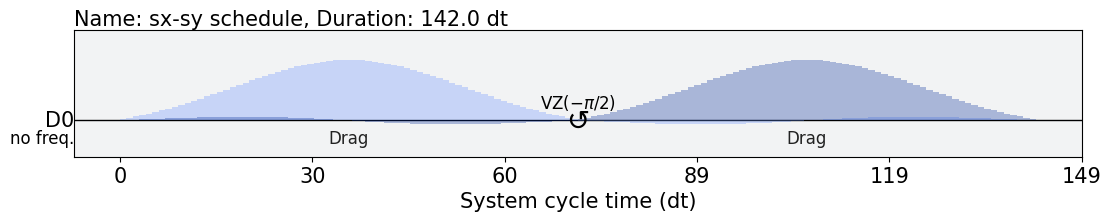

In [12]:
import numpy as np
import qiskit.pulse as pulse

# Strength of the Rabi-rate in GHz.
r = 0.1

# Frequency of the qubit transition in GHz.
w = 5.

# Sample rate of the backend in ns.
dt = 0.222

# Define gaussian envelope function to have a pi rotation.
amp = 1.
area = 1
sig = area*0.399128/r/amp
T = 4*sig
duration = int(T / dt)
beta = 2.0

# The 1.75 factor is used to approximately get a sx gate.
# Further "calibration" could be done to refine the pulse amplitude.
with pulse.build(name="sx-sy schedule") as xp:
    pulse.play(pulse.Drag(duration, amp / 1.75, sig / dt, beta), pulse.DriveChannel(0))
    pulse.shift_phase(np.pi/2, pulse.DriveChannel(0))
    pulse.play(pulse.Drag(duration, amp / 1.75, sig / dt, beta), pulse.DriveChannel(0))

xp.draw()

#### 2. Convert the pulse schedule to a Qiskit Dynamics Signal

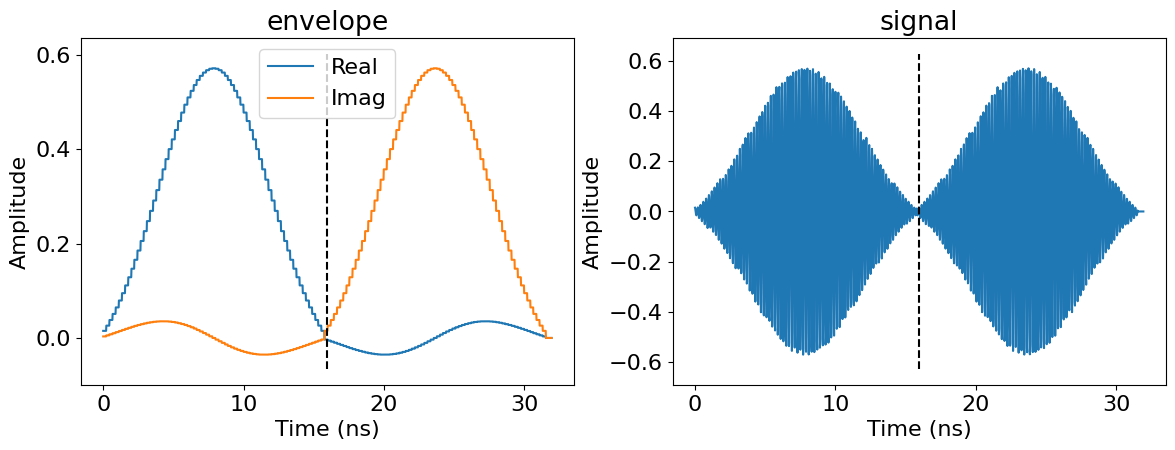

In [13]:
from matplotlib import pyplot as plt
from qiskit_dynamics.pulse import InstructionToSignals

plt.rcParams["font.size"] = 16

converter = InstructionToSignals(dt, carriers={"d0": w})

signals = converter.get_signals(xp)
fig, axs = plt.subplots(1, 2, figsize=(14, 4.5))
for ax, title in zip(axs, ["envelope", "signal"]):
    signals[0].draw(0, 2*T, 2000, title, axis=ax)
    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("Amplitude")
    ax.set_title(title)
    ax.vlines(T, ax.get_ylim()[0], ax.get_ylim()[1], "k", linestyle="dashed")

#### 3. Create the System Model

In [14]:
from qiskit.quantum_info.operators import Operator
from qiskit_dynamics import Solver

# construct operators
X = Operator.from_label('X')
Z = Operator.from_label('Z')

drift = 2 * np.pi * w * Z/2
operators = [2 * np.pi * r * X/2]

# construct the solver
hamiltonian_solver = Solver(
    static_hamiltonian=drift,
    hamiltonian_operators=operators,
    rotating_frame=drift,
    rwa_cutoff_freq=2 * 5.0,
    hamiltonian_channels=['d0'],
    channel_carrier_freqs={'d0': w},
    dt=dt
)

#### 4. Simulate the Pulse schedule using the model

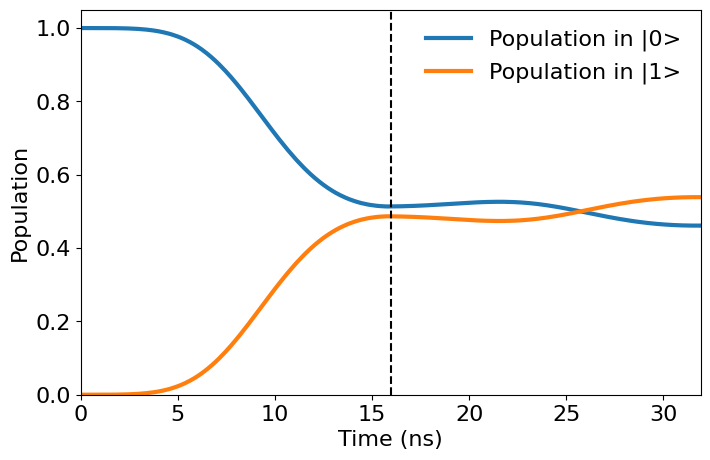

In [15]:
from qiskit.quantum_info.states import Statevector

# Start the qubit in its ground state.
y0 = Statevector([1., 0.])

sol = hamiltonian_solver.solve(t_span=[0., 2*T], y0=y0, signals=xp, atol=1e-8, rtol=1e-8)

def plot_populations(sol):
    pop0 = [psi.probabilities()[0] for psi in sol.y]
    pop1 = [psi.probabilities()[1] for psi in sol.y]

    fig = plt.figure(figsize=(8, 5))
    plt.plot(sol.t, pop0, lw=3, label="Population in |0>")
    plt.plot(sol.t, pop1, lw=3, label="Population in |1>")
    plt.xlabel("Time (ns)")
    plt.ylabel("Population")
    plt.legend(frameon=False)
    plt.ylim([0, 1.05])
    plt.xlim([0, 2*T])
    plt.vlines(T, 0, 1.05, "k", linestyle="dashed")
    
plot_populations(sol)

# What Next?

![](community_links.png)